In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
import missingno as msno

# Data Exploration and Data pre-processing

In [112]:
df = pd.read_csv('weatherAUS.csv')

In [113]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       12/1/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1       12/2/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2       12/3/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3       12/4/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4       12/5/2008   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455  6/21/2017    Uluru      2.8     23.4       0.0          NaN       NaN   
145456  6/22/2017    Uluru      3.6     25.3       0.0          NaN       NaN   
145457  6/23/2017    Uluru      5.4     26.9       0.0          NaN       NaN   
145458  6/24/2017    Uluru      7.8     27.0       0.0          NaN       NaN   
145459  6/25/2017    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0                W           44.0          W  ...        71.0         22.0   
1              WNW           44.0        NNW  ...        44.0         25.0   
2              WSW           46.0          W  ...        38.0         30.0   
3               NE           24.0         SE  ...        45.0         16.0   
4                W           41.0        ENE  ...        82.0         33.0   
...            ...            ...        ...  ...         ...          ...   
145455           E           31.0         SE  ...        51.0         24.0   
145456         NNW           22.0         SE  ...        56.0         21.0   
145457           N           37.0         SE  ...        53.0         24.0   
145458          SE           28.0        SSE  ...        51.0         24.0   
145459         NaN            NaN        ESE  ...        62.0         36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  
...           ...           ...  
145455         No            No  
145456         No            No  
145457         No            No  
145458         No            No  
145459         No           NaN  

[145460 rows x 23 columns]

In [114]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [115]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot: >

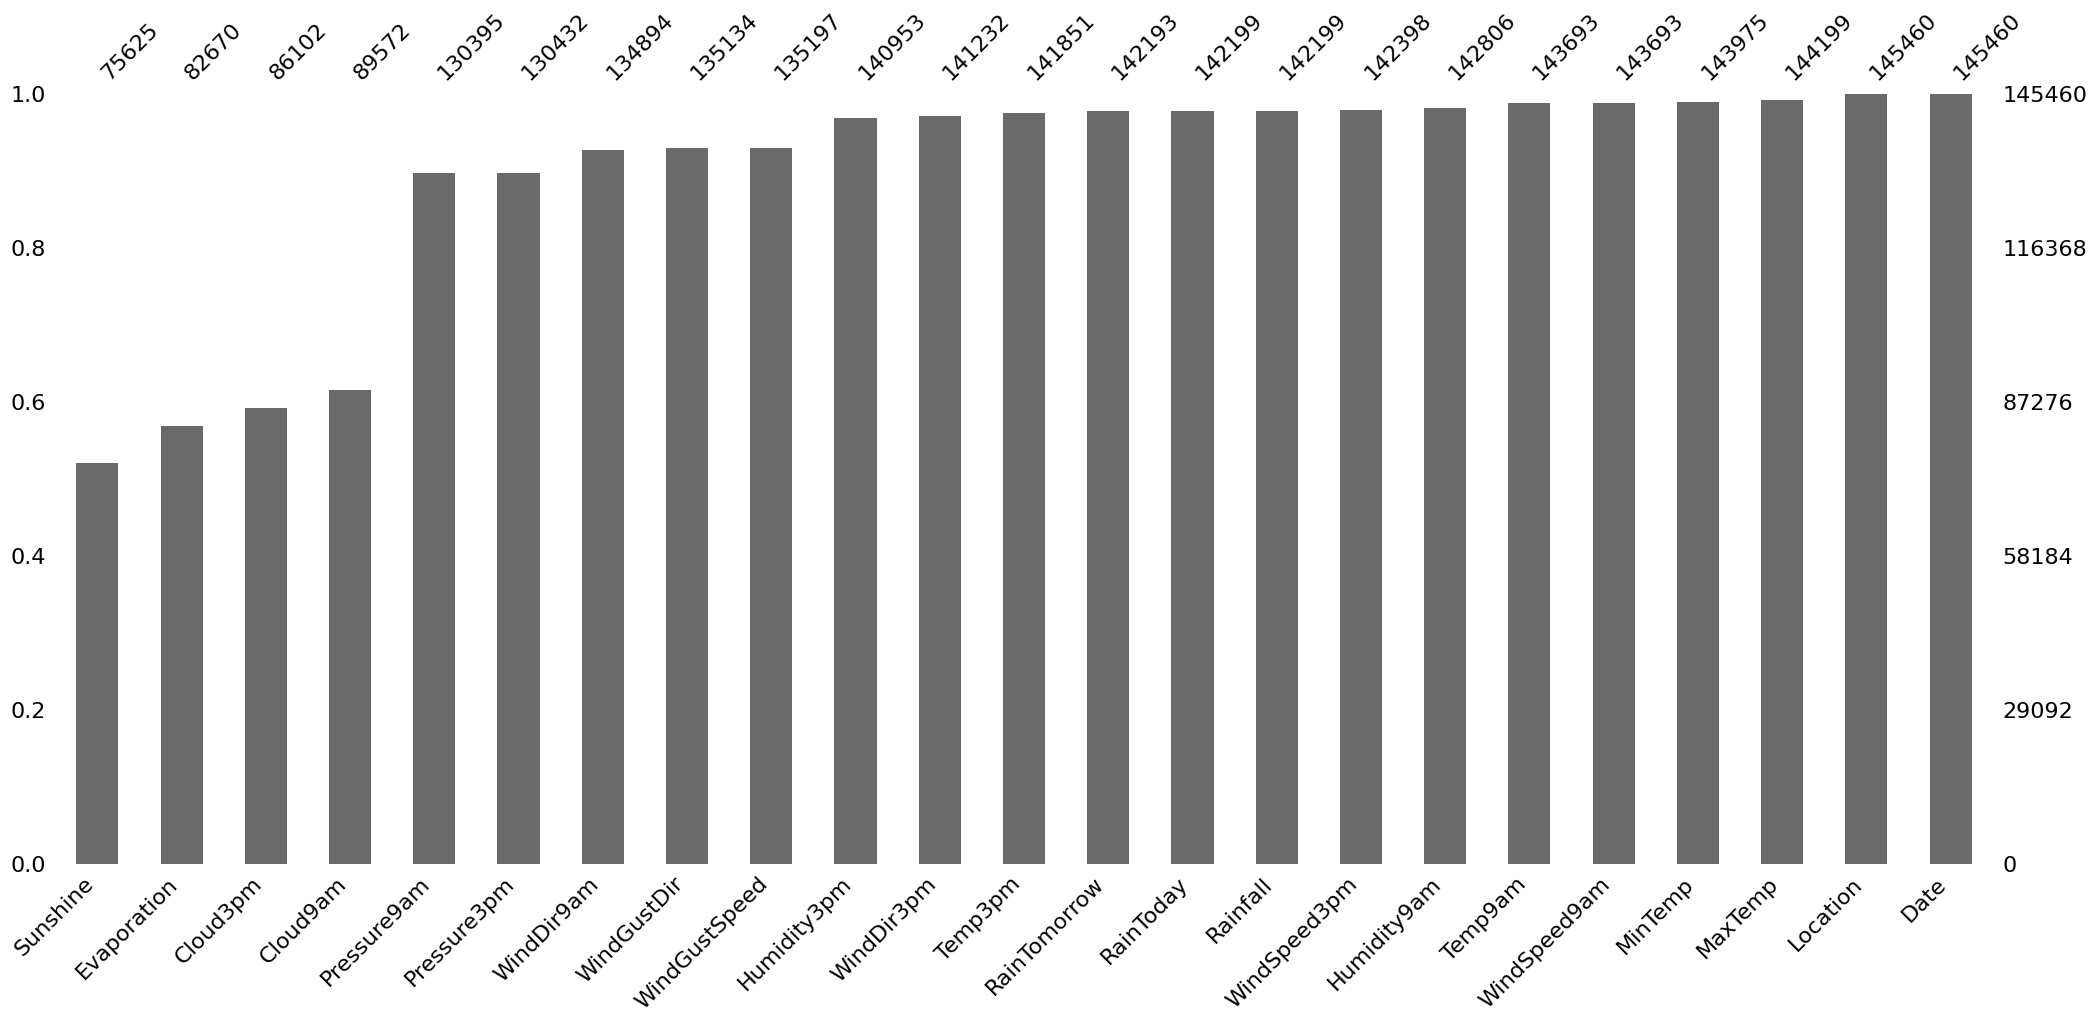

In [117]:
msno.bar(df, sort='ascending')

### some columns has more null values.  therefore we can remove these (Sunshine,Evaporation,Cloud3pm,Cloud9pm) columns


In [118]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm", "Date"], axis =1)
df.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [119]:
#method 1 - remove rows that has non values
df = df.dropna(axis = 0)
df.shape

(112925, 18)

In [120]:
#method2 - replace non values by mean according to the location
mean_df=df.groupby(['Location']).mean()
mean_df

/tmp/ipykernel_19351/2009168622.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(['Location']).mean()


MinTemp    MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
Location                                                                        
Adelaide          12.850255  23.068540  1.634818      37.461314     10.843066   
Albury            10.376926  23.411557  2.180902      34.894262      9.942213   
AliceSprings      13.688484  29.588047  0.914577      41.139577     15.941327   
BadgerysCreek     11.579092  24.238775  2.370951      34.441302      9.281919   
Ballarat           7.436440  18.340925  1.670357      45.551857     20.568325   
Bendigo            8.998231  22.017213  1.696498      39.852193     14.105787   
Brisbane          16.410828  26.463874  3.047550      28.350662      7.121523   
Cairns            21.194619  29.534253  5.685892      38.235943     16.164539   
Canberra           7.226532  21.056881  1.871706      40.882936     11.616147   
Cobar             13.073146  25.727461  1.150428      36.606990     14.629815   
CoffsHarbour      14.497469  23.933136  5.026730      39.423488     15.565441   
Dartmoor           9.246207  20.150392  2.374629      41.197036     13.149085   
Darwin            23.184184  32.541931  5.028168      40.567212     15.159448   
GoldCoast         17.279263  25.712159  3.635378      42.563275     19.492024   
Hobart             9.092781  17.903658  1.617028      47.787957     16.542570   
Katherine         20.575224  34.971194  2.817313      38.805970     12.362687   
Launceston         8.606567  19.515735  2.322822      37.602731     10.001951   
Melbourne         11.822839  20.974384  1.851142      45.625616     19.178236   
MelbourneAirport   9.967212  20.502352  1.466326      47.220859     20.552488   
Mildura           10.893338  24.986814  0.954746      37.498792     14.437694   
Moree             12.919893  27.045150  1.615519      39.880943     18.390262   
MountGambier       8.901109  19.914033  2.087872      43.284477     17.944560   
Nhil               9.131291  22.579183  0.953623      43.069170     16.911726   
NorahHead         15.325278  22.550592  3.451706      42.357989     14.243088   
NorfolkIsland     16.836732  21.785894  3.152165      42.794693     20.329958   
Nuriootpa          9.541039  21.929498  1.391828      41.085305     14.815412   
PearceRAAF        12.559723  26.556957  1.596420      43.777868     16.493084   
Perth             13.069312  25.192558  1.846098      35.217978     11.170563   
PerthAirport      12.680021  25.605748  1.737530      44.359904     17.984605   
Portland           9.608794  18.085000  2.516241      42.541844     16.775177   
Richmond          12.335498  24.883203  2.579785      37.446777      9.658203   
Sale               8.636197  20.343437  1.530567      42.693601     14.713346   
Sydney            15.065029  23.292386  3.521381      41.757857     15.298362   
SydneyAirport     14.880164  23.385388  2.984568      47.246842     18.577672   
Townsville        20.556519  29.419036  3.441193      39.097434     15.833564   
Tuggeranong        8.024180  21.098273  2.341710      36.985751      9.622625   
Uluru             14.454564  30.452006  0.721577      41.468188     17.986860   
WaggaWagga         9.777679  23.187929  1.740929      37.024643     13.431429   
Walpole           12.113989  20.722382  2.913909      40.969225     15.081135   
Watsonia          10.196563  21.002157  1.836490      38.940768     10.636197   
Williamtown       12.881959  24.303144  3.569339      42.058770     16.878815   
Witchcliffe       11.194651  22.054098  2.913460      41.384814     15.342968   
Wollongong        14.939321  21.468883  3.549115      46.070835     17.174557   
Woomera           13.407727  26.623112  0.501698      44.155232     20.213098   

                  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Location                                                                
Adelaide             15.863869    58.732482    44.595985  1018.298577   
Albury               15.225000    71.798361    46.701230  1017.252910   
A

### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form

In [121]:

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])


In [122]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              1     13.4     22.9       0.6           13           44.0   
1              1      7.4     25.1       0.0           14           44.0   
2              1     12.9     25.7       0.0           15           46.0   
3              1      9.2     28.0       0.0            4           24.0   
4              1     17.5     32.3       1.0           13           41.0   
...          ...      ...      ...       ...          ...            ...   
145454        36      3.5     21.8       0.0            0           31.0   
145455        36      2.8     23.4       0.0            0           31.0   
145456        36      3.6     25.3       0.0            6           22.0   
145457        36      5.4     26.9       0.0            3           37.0   
145458        36      7.8     27.0       0.0            9           28.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               13          14          20.0          24.0         71.0   
1                6          15           4.0          22.0         44.0   
2               13          15          19.0          26.0         38.0   
3                9           0          11.0           9.0         45.0   
4                1           7           7.0          20.0         82.0   
...            ...         ...           ...           ...          ...   
145454           2           0          15.0          13.0         59.0   
145455           9           1          13.0          11.0         51.0   
145456           9           3          13.0           9.0         56.0   
145457           9          14           9.0           9.0         53.0   
145458          10           3          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0              22.0       1007.7       1007.1     16.9     21.8          0   
1              25.0       1010.6       1007.8     17.2     24.3          0   
2              30.0       1007.6       1008.7     21.0     23.2          0   
3              16.0       1017.6       1012.8     18.1     26.5          0   
4              33.0       1010.8       1006.0     17.8     29.7          0   
...             ...          ...          ...      ...      ...        ...   
145454         27.0       1024.7       1021.2      9.4     20.9          0   
145455         24.0       1024.6       1020.3     10.1     22.4          0   
145456         21.0       1023.5       1019.1     10.9     24.5          0   
145457         24.0       1021.0       1016.8     12.5     26.1          0   
145458         24.0       1019.4       1016.5     15.1     26.0          0   

        RainTomorrow  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
145454             0  
145455             0  
145456             0  
145457             0  
145458             0  

[112925 rows x 18 columns]

### remove nan values

In [123]:
#pd.set_option('display.max_rows', 500)
#df[:500]

In [124]:
#df=df.fillna(df.groupby(['Location']).transform("mean"))
#df[:500]

In [125]:
#df[7500:8000]

In [126]:
#msno.bar(df, sort='ascending')

In [127]:
#df = df.dropna(axis = 0)
#df.shape

### Plot every pair of data to find co-relations

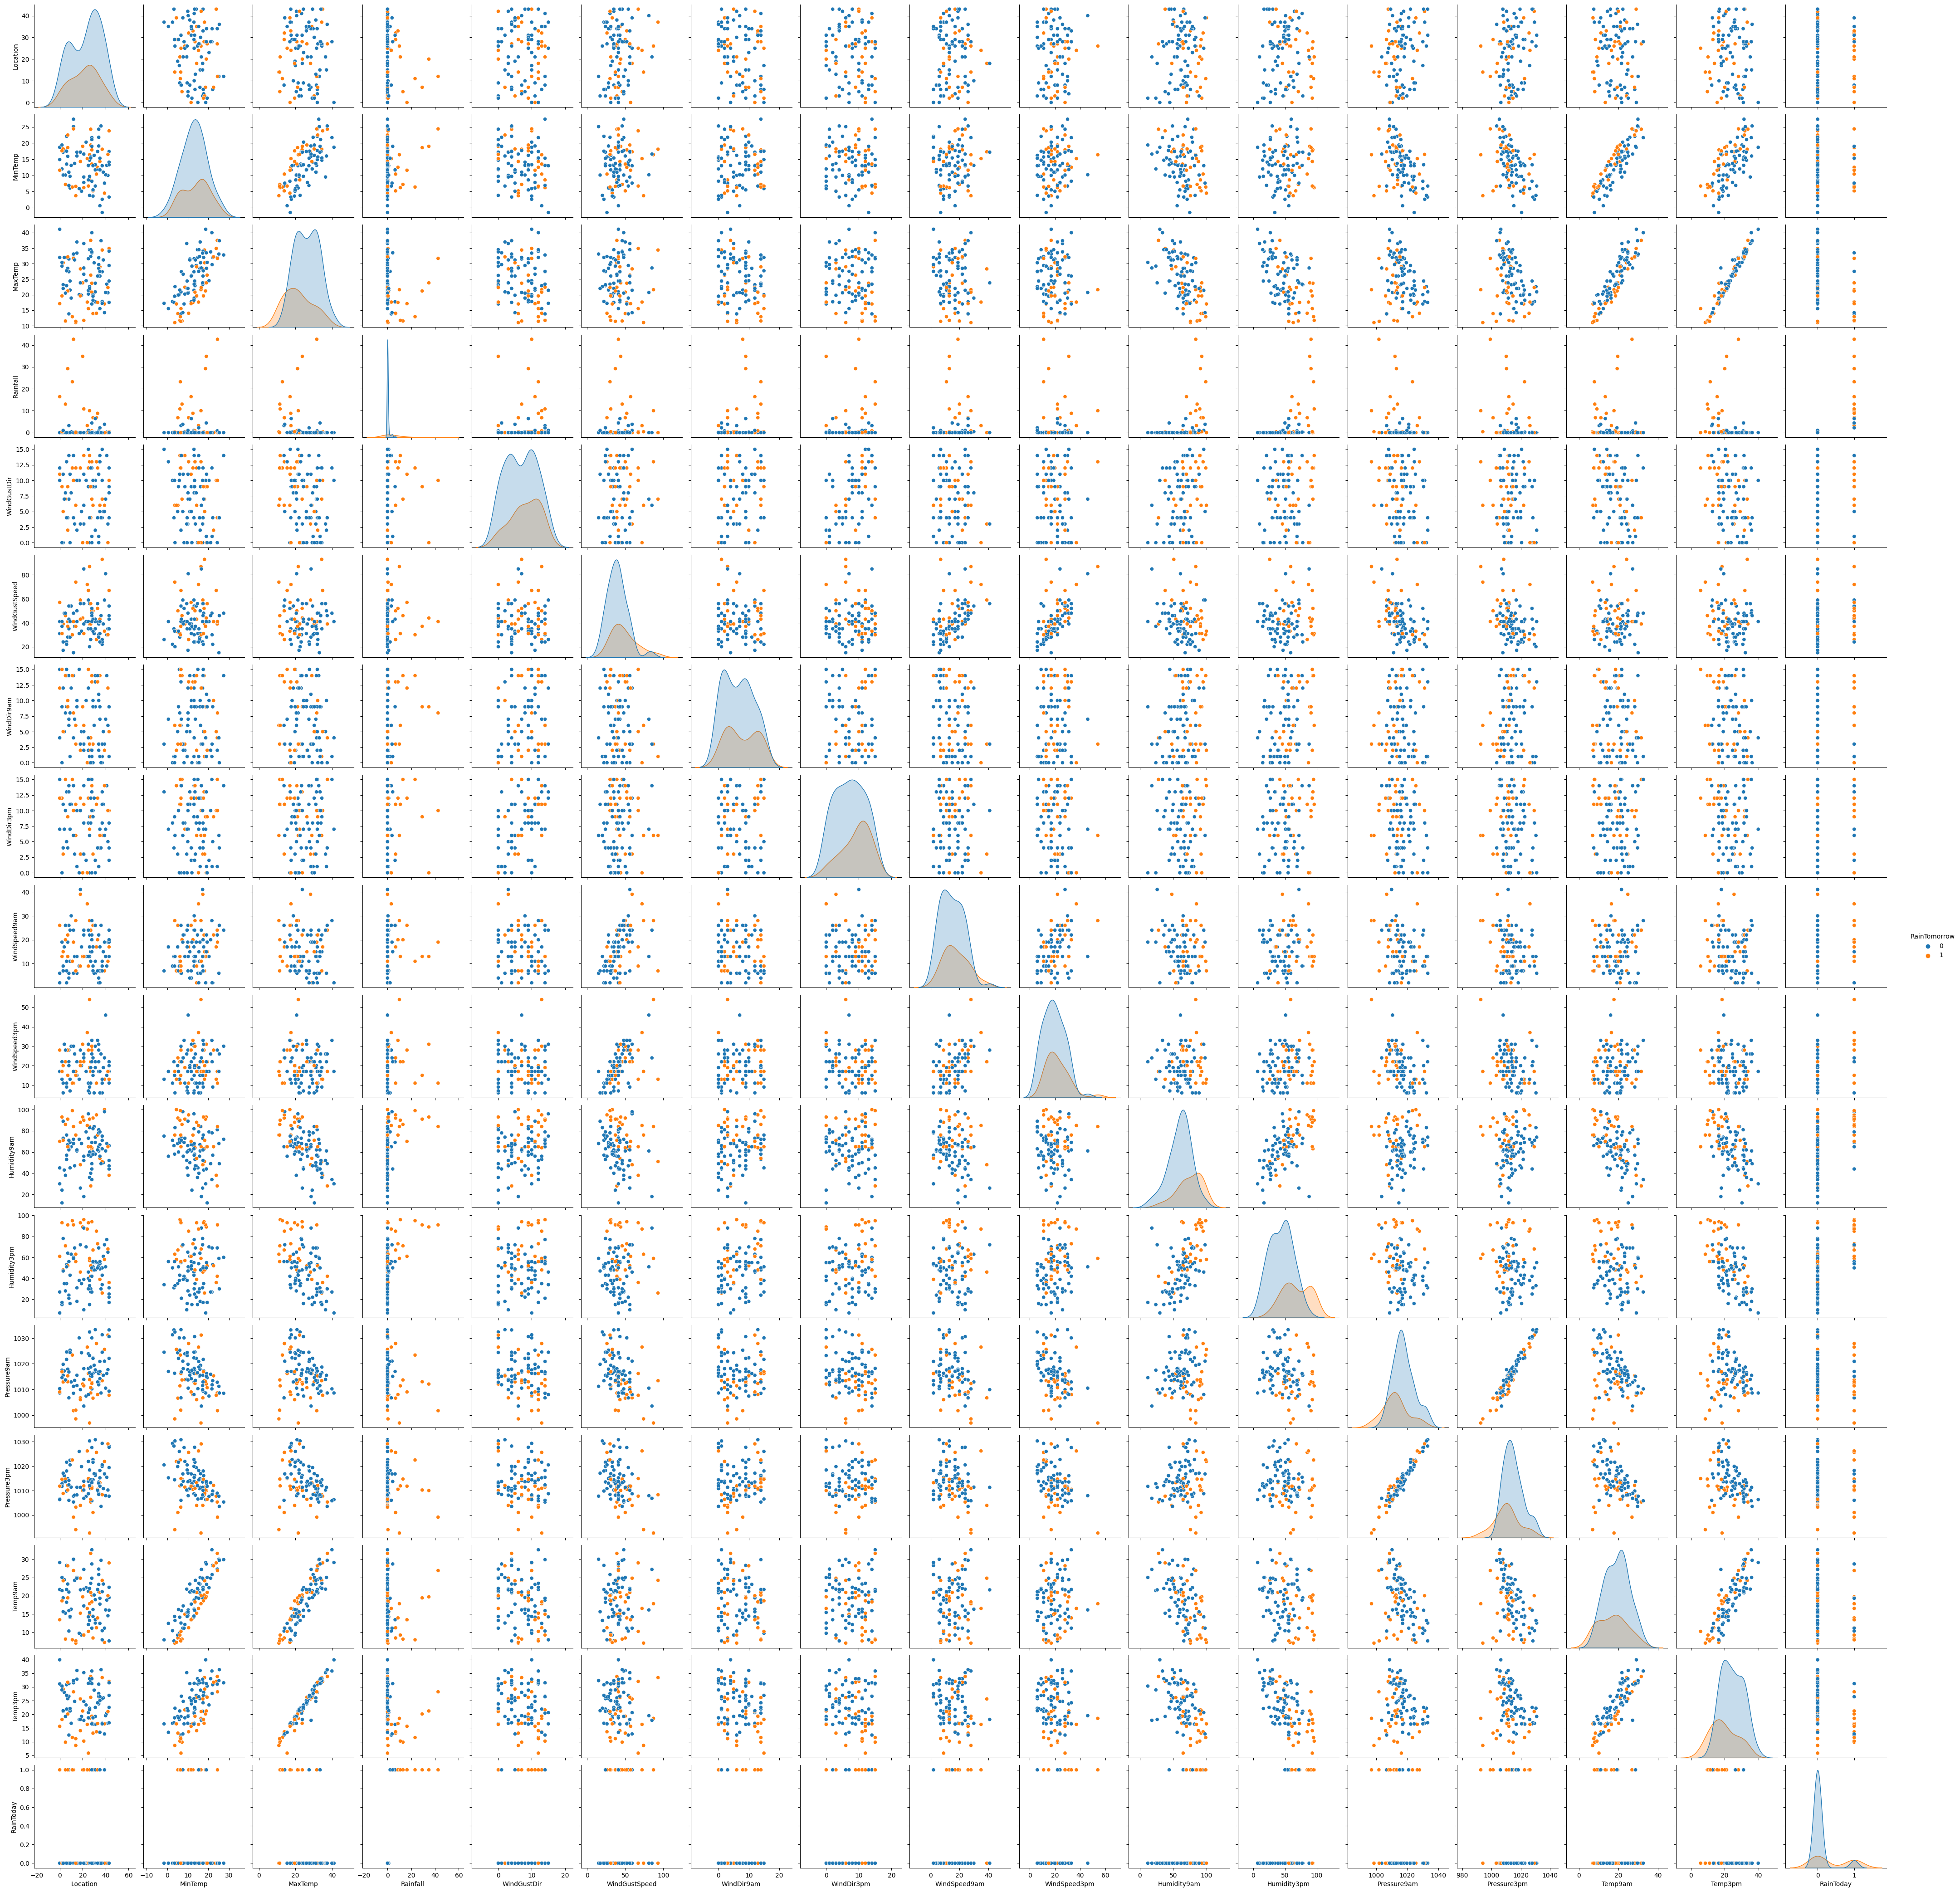

In [128]:
sns.pairplot(df.sample(n=100),hue = 'RainTomorrow')

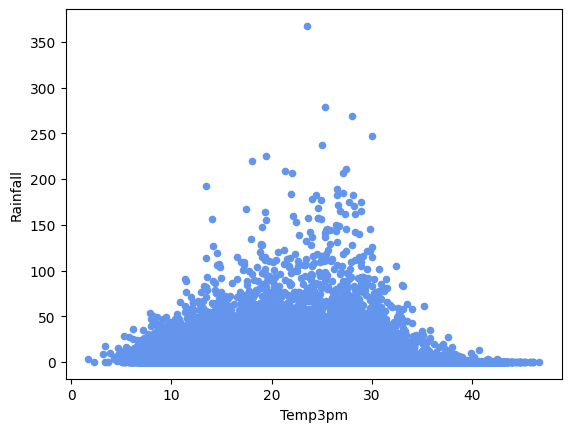

In [129]:
df.plot(
   x='Temp3pm', 
   y='Rainfall', 
   kind='scatter', 
   c='cornflowerblue'
)

plt.show()

### Effect of the data for Rain tommarow

<AxesSubplot: xlabel='MaxTemp', ylabel='MinTemp'>

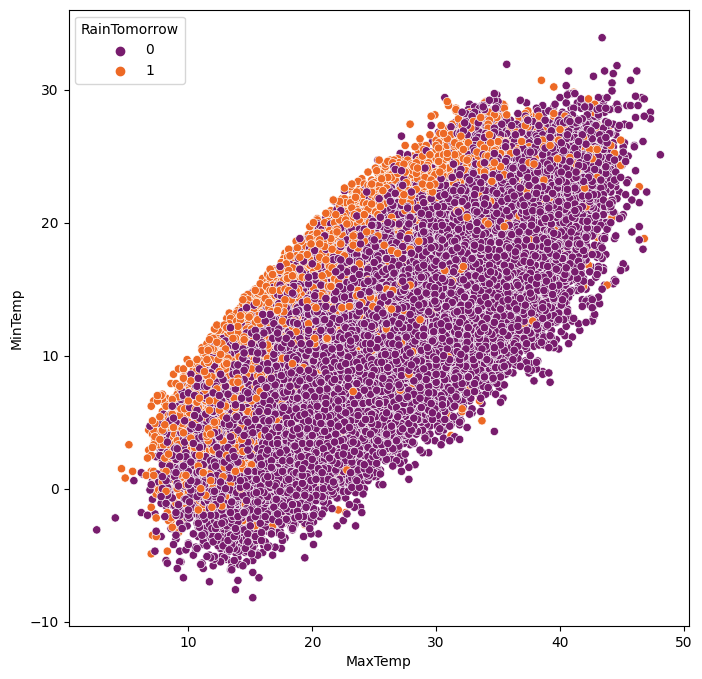

In [130]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot: xlabel='Humidity9am', ylabel='Temp9am'>

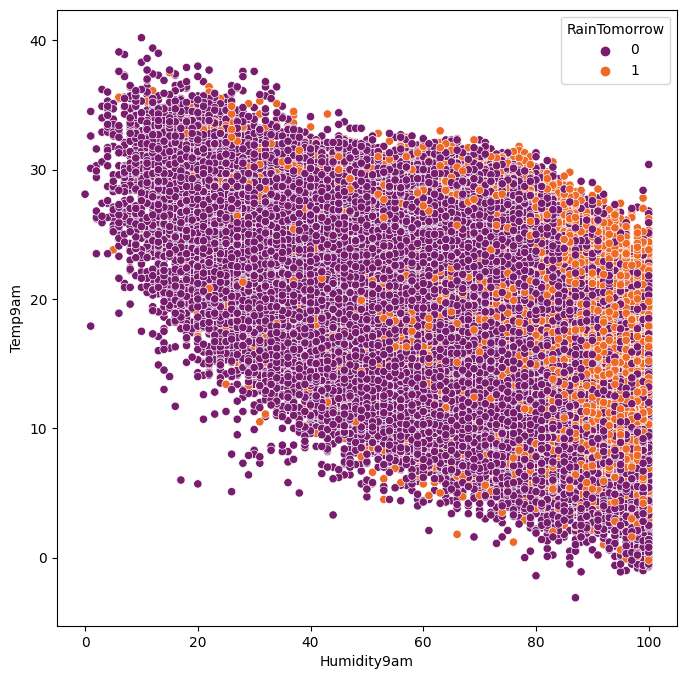

In [131]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

### co-relations between data columns

<AxesSubplot: >

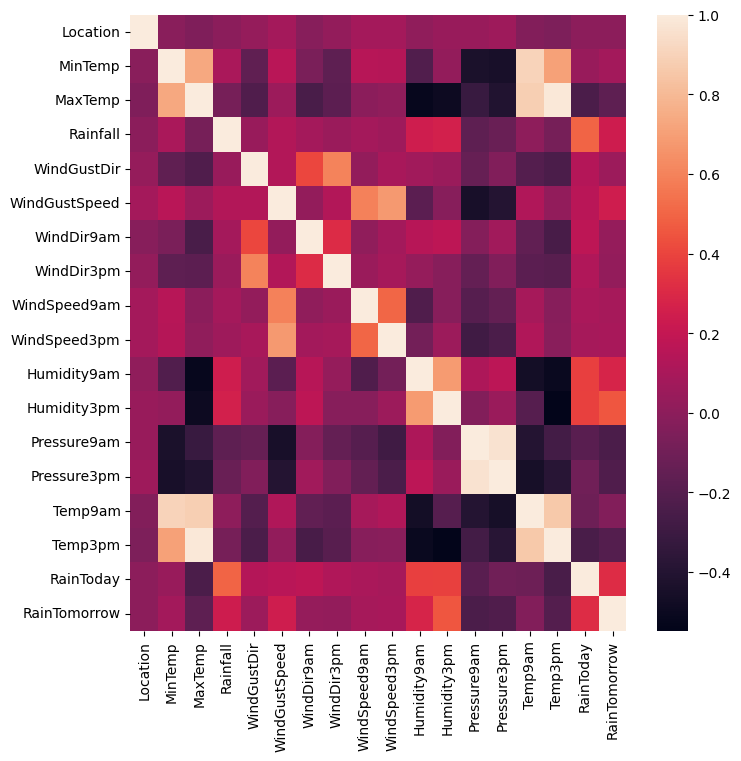

In [132]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

# Modeling and Perfomance Analysis

In [133]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [134]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 112925, dtype: int64


In [135]:
x.shape

(112925, 17)

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# 1. Predict Tommarow Rain

### linear regression

In [137]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [138]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score: 0.8476


In [140]:
#import classification regression
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17570
           1       0.73      0.49      0.59      5015

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



### Neural network

In [141]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=8
)

Epoch 1/8
2824/2824 [==============================] - 5s 2ms/step - loss: 1.2366 - accuracy: 0.7826
Epoch 2/8
2824/2824 [==============================] - 4s 2ms/step - loss: 0.6817 - accuracy: 0.8037
Epoch 3/8
2824/2824 [==============================] - 4s 2ms/step - loss: 0.5493 - accuracy: 0.8117
Epoch 4/8
2824/2824 [==============================] - 5s 2ms/step - loss: 0.4727 - accuracy: 0.8221
Epoch 5/8
2824/2824 [==============================] - 4s 2ms/step - loss: 0.4427 - accuracy: 0.8257
Epoch 6/8
2824/2824 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8308
Epoch 7/8
2824/2824 [==============================] - 5s 2ms/step - loss: 0.3884 - accuracy: 0.8357
Epoch 8/8
2824/2824 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8369


In [142]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1152      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
model.evaluate(x_test, y_test, verbose=0)


[0.3633447289466858, 0.8430374264717102]

# APP

In [144]:
x_test

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
60801          5      2.5     12.8       0.4            7           35.0   
130855        14      3.9     12.4       3.6           15           52.0   
34912         33     15.8     22.0       0.0            2           31.0   
21539         24     20.1     26.3       2.2            9           26.0   
51967         35     15.7     20.2       4.2           10           35.0   
...          ...      ...      ...       ...          ...            ...   
58753          5      7.4     11.2       0.6            7           33.0   
137573         2     11.6     30.4       0.0            0           56.0   
41181         40     10.3     22.3       0.0            9           31.0   
78573         39      3.0     13.7       0.2            5           50.0   
86570          6     13.3     33.8       0.0            1           20.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
60801           14           7           2.0          13.0         98.0   
130855          13          11          11.0           9.0         63.0   
34912            9           0          13.0          20.0         61.0   
21539            9           9          11.0          19.0         83.0   
51967            9           3           9.0           6.0         75.0   
...            ...         ...           ...           ...          ...   
58753            6           6          11.0          19.0         91.0   
137573           2           9          11.0          33.0         25.0   
41181           15           2          17.0          22.0         29.0   
78573            4           3           6.0          15.0         80.0   
86570           12           4           6.0           7.0         45.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
60801          77.0       1019.5       1018.4      6.9     12.5          0  
130855         54.0       1015.2       1017.0      7.1      9.7          1  
34912          53.0       1020.5       1018.6     18.4     19.9          0  
21539          72.0       1016.9       1016.8     23.5     24.4          1  
51967          76.0       1019.2       1017.4     16.5     18.6          1  
...             ...          ...          ...      ...      ...        ...  
58753          65.0       1018.1       1015.1      8.1     10.1          0  
137573         14.0       1018.7       1014.1     22.3     29.0          0  
41181          40.0       1017.7       1015.1     19.9     21.2          0  
78573          51.0       1019.5       1017.0      7.6     12.8          0  
86570          17.0       1026.7       1022.9     24.9     31.4          0  

[22585 rows x 17 columns]

In [146]:
n=60801

In [147]:
x_input=[]
for i in range(len(x.columns)):
    inp=float(input("Enter {}: ".format(x.columns[i])))
    x_input.append(inp)
   

Enter Location: 5
Enter MinTemp: 2.5
Enter MaxTemp: 12.8
Enter Rainfall: 0.4
Enter WindGustDir: 7
Enter WindGustSpeed: 35.0
Enter WindDir9am: 14
Enter WindDir3pm: 7
Enter WindSpeed9am: 2.0
Enter WindSpeed3pm: 13.0
Enter Humidity9am: 98.0
Enter Humidity3pm: 77.0
Enter Pressure9am: 1019.5
Enter Pressure3pm: 1018.4
Enter Temp9am: 6.9
Enter Temp3pm: 12.5
Enter RainToday: 0


In [148]:
x_input=np.array(x_input)
predicted_val=model.predict(np.array([x_input]))
predict=[1 if predicted_val>0.5 else 0]
predicted=le.inverse_transform(predict)
predicted

1/1 [==============================] - 0s 47ms/step


array(['No'], dtype=object)

In [150]:
real=le.inverse_transform(np.array([y_test[n]]))
real

array(['No'], dtype=object)

# 2. predict mintemp,maxtemp,rainfall

In [151]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              1     13.4     22.9       0.6           13           44.0   
1              1      7.4     25.1       0.0           14           44.0   
2              1     12.9     25.7       0.0           15           46.0   
3              1      9.2     28.0       0.0            4           24.0   
4              1     17.5     32.3       1.0           13           41.0   
...          ...      ...      ...       ...          ...            ...   
145454        36      3.5     21.8       0.0            0           31.0   
145455        36      2.8     23.4       0.0            0           31.0   
145456        36      3.6     25.3       0.0            6           22.0   
145457        36      5.4     26.9       0.0            3           37.0   
145458        36      7.8     27.0       0.0            9           28.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               13          14          20.0          24.0         71.0   
1                6          15           4.0          22.0         44.0   
2               13          15          19.0          26.0         38.0   
3                9           0          11.0           9.0         45.0   
4                1           7           7.0          20.0         82.0   
...            ...         ...           ...           ...          ...   
145454           2           0          15.0          13.0         59.0   
145455           9           1          13.0          11.0         51.0   
145456           9           3          13.0           9.0         56.0   
145457           9          14           9.0           9.0         53.0   
145458          10           3          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0              22.0       1007.7       1007.1     16.9     21.8          0   
1              25.0       1010.6       1007.8     17.2     24.3          0   
2              30.0       1007.6       1008.7     21.0     23.2          0   
3              16.0       1017.6       1012.8     18.1     26.5          0   
4              33.0       1010.8       1006.0     17.8     29.7          0   
...             ...          ...          ...      ...      ...        ...   
145454         27.0       1024.7       1021.2      9.4     20.9          0   
145455         24.0       1024.6       1020.3     10.1     22.4          0   
145456         21.0       1023.5       1019.1     10.9     24.5          0   
145457         24.0       1021.0       1016.8     12.5     26.1          0   
145458         24.0       1019.4       1016.5     15.1     26.0          0   

        RainTomorrow  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
145454             0  
145455             0  
145456             0  
145457             0  
145458             0  

[112925 rows x 18 columns]

In [152]:
y2 = df[['MinTemp','MaxTemp','Rainfall']]
x2 = df.drop(['RainTomorrow','RainToday','MinTemp','MaxTemp','Rainfall'], axis = 1)

In [153]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2)

In [154]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',input_shape=(x2.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=['accuracy']
)

model.fit(
    x2_train,
    y2_train,
    epochs=8
)

Epoch 1/8
2824/2824 [==============================] - 5s 2ms/step - loss: 3.0909 - accuracy: 0.9588
Epoch 2/8
2824/2824 [==============================] - 4s 2ms/step - loss: 2.2205 - accuracy: 0.9665
Epoch 3/8
2824/2824 [==============================] - 4s 2ms/step - loss: 1.9802 - accuracy: 0.9685
Epoch 4/8
2824/2824 [==============================] - 4s 2ms/step - loss: 1.8215 - accuracy: 0.9689
Epoch 5/8
2824/2824 [==============================] - 4s 2ms/step - loss: 1.7121 - accuracy: 0.9689
Epoch 6/8
2824/2824 [==============================] - 4s 2ms/step - loss: 1.6402 - accuracy: 0.9690
Epoch 7/8
2824/2824 [==============================] - 4s 2ms/step - loss: 1.6027 - accuracy: 0.9691
Epoch 8/8
2824/2824 [==============================] - 4s 2ms/step - loss: 1.5795 - accuracy: 0.9689


In [155]:
model.evaluate(x2_test, y2_test, verbose=0)

[1.488965630531311, 0.9708656072616577]

In [156]:
y2_test[:10]

MinTemp  MaxTemp  Rainfall
121257     28.1     41.0       0.0
95570      13.8     27.0       0.0
20235      21.6     30.5       0.0
55501       9.2     27.0       0.0
131275      3.9     13.0       0.0
44621      12.3     19.6       0.0
90689      22.4     31.3       0.0
46019      10.4     34.7       0.0
139966     20.6     31.0       2.6
120339     10.1     17.7       9.4

In [157]:
np.around(model.predict(x2_test[:10]),decimals=1)

1/1 [==============================] - 0s 42ms/step


array([[20.8, 40.2, -0.2],
       [13.8, 27.4, -0.1],
       [21.8, 28.3,  3.1],
       [ 9.7, 26. , -0. ],
       [ 2.3, 11.5,  0.7],
       [13. , 18.9,  0.1],
       [23.8, 32.2, -0. ],
       [10.7, 34.5, -0.1],
       [20.8, 31.7, -0. ],
       [ 8.1, 18. ,  0.5]], dtype=float32)

# 3. Predict Whether in the evening

<font color=blue>Similar to models above.just try to implement</font>